In [44]:
# loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# loading the dataset
df = pd.read_csv('nobel.csv')

# checking out the columns of the dataset
print(df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


## 1. What is the most commonly awarded gender and birth country?

In [45]:
# finding out most commonly awarded gender
top_gender = df['sex'].value_counts().index[0]

# finding out most commonly awarded birth country
top_country = df['birth_country'].value_counts().index[0]

print(f'The most commonly awarded gender: {top_gender} and country: {top_country}')

The most commonly awarded gender: Male and country: United States of America


## 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [46]:
# creating US born winners column
df['us_born'] = df['birth_country'] == 'United States of America'

# creating the decade column
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)

# finding the ratio of US born winners by decade
ratio_usa_winners = df.groupby('decade', as_index = False)['us_born'].mean()

# identifying the decade with the highest ratio of US born winners
max_decade_usa = ratio_usa_winners[ratio_usa_winners['us_born'] == ratio_usa_winners['us_born'].max()]['decade'].values[0]

print(f'The decade that had the highest ratio of US-born Nobel Prize winners to total winners in all categories: {max_decade_usa}')

The decade that had the highest ratio of US-born Nobel Prize winners to total winners in all categories: 2000


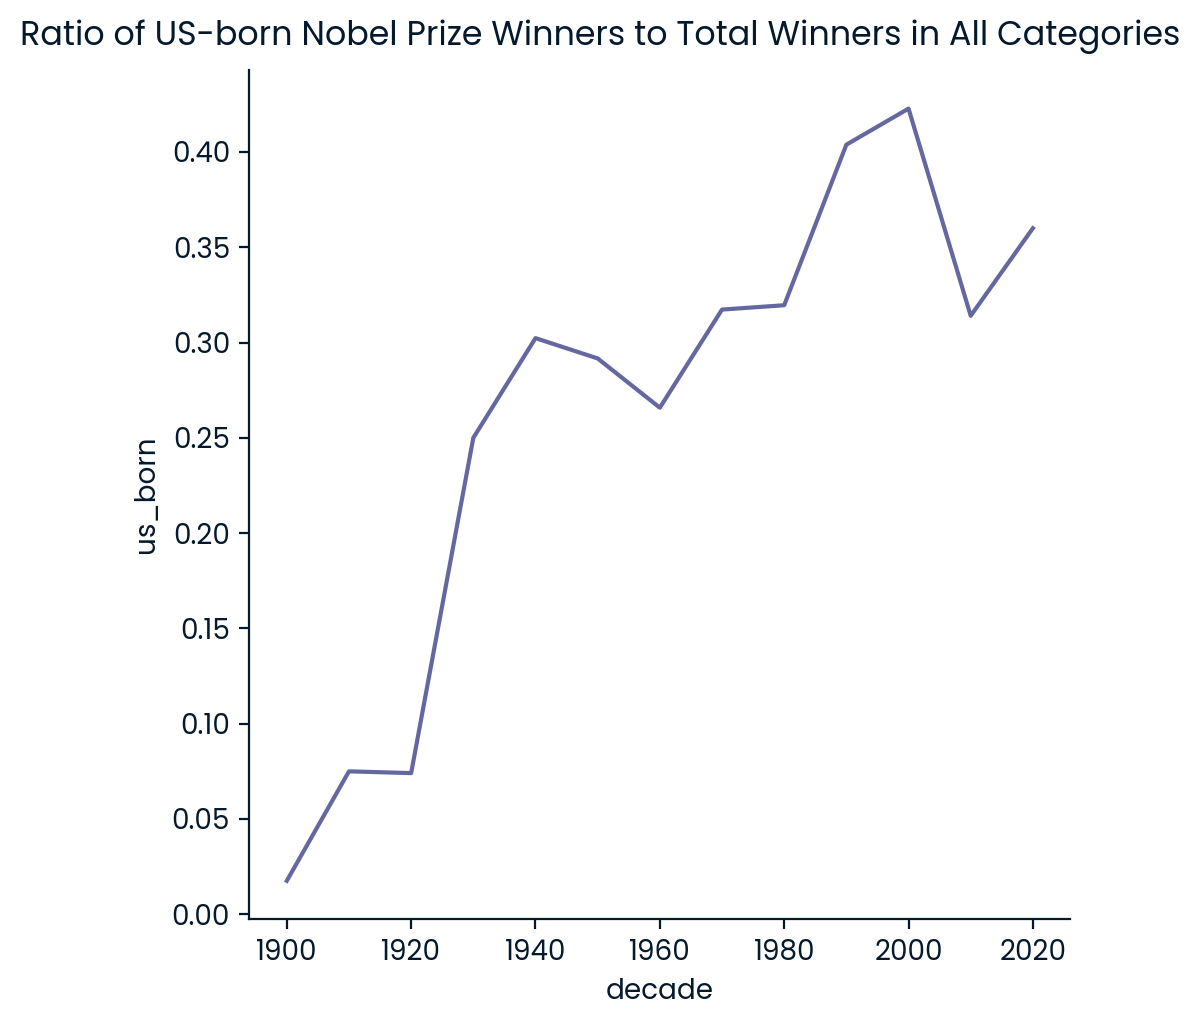

In [47]:
# creating a relational line plot
g = sns.relplot(x = 'decade', y = 'us_born', data = df, kind = 'line', ci = None)
g.fig.suptitle('Ratio of US-born Nobel Prize Winners to Total Winners in All Categories', y = 1.02)

plt.show()

## 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [48]:
# filtering for female winners
df['female_winner'] = df['sex'] == 'Female'

# grouping by decade and category
female_decade_cat = df.groupby(['decade', 'category'], as_index = False)['female_winner'].mean()

# finding the decade and category with the highest female winners
max_female_decade_cat = female_decade_cat[female_decade_cat['female_winner'] == female_decade_cat['female_winner'].max()][['decade', 'category']]

# creating a dictionary
max_female_dict = {max_female_decade_cat['decade'].values[0] : max_female_decade_cat['category'].values[0]}

print(f'The decade and Nobel Prize category that had the highest proportion of female laureates: {max_female_dict}')

The decade and Nobel Prize category that had the highest proportion of female laureates: {2020: 'Literature'}


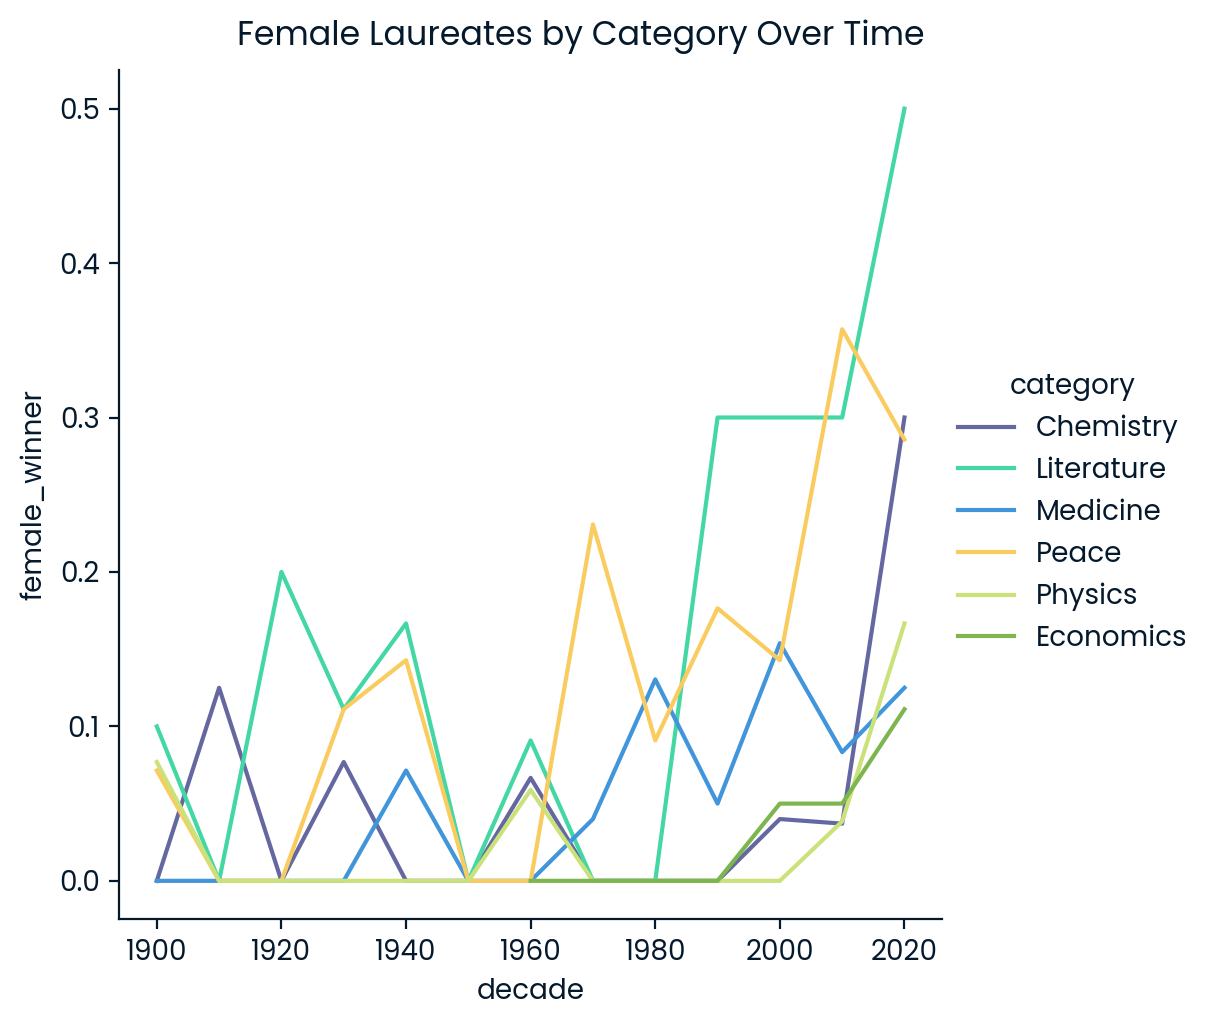

In [49]:
# creating a relational line plot with multiple categories
g = sns.relplot(x = 'decade', y = 'female_winner', data = df, kind = 'line', hue = 'category', ci = None)

g.fig.suptitle('Female Laureates by Category Over Time', y = 1.02)

plt.show()

## 4. Who was the first woman to receive a Nobel Prize, and in what category?

In [50]:
# filtering the dataframe
new_df = df[df['female_winner']]

# finding the first woman to receive a nobel prize
first_woman_name = new_df[new_df['year'] == new_df['year'].min()]['full_name'].values[0]

# finding the category 
first_woman_category = new_df[new_df['year'] == new_df['year'].min()]['category'].values[0]

print(f'The first woman to receive a Nobel Prize is {first_woman_name} and the category is {first_woman_category}')

The first woman to receive a Nobel Prize is Marie Curie, née Sklodowska and the category is Physics


## 5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [51]:
# determining repeat winners
counts = df['full_name'].value_counts()

repeat_winners = counts[counts >= 2].index

repeat_list = list(repeat_winners)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
